## Start with IMDB Basics & merge with IMDB Ratings

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
imdb_tb_df = pd.read_csv('../rawData/zippedData/imdb.title.basics.csv.gz')
imdb_tb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [320]:
imdb_tr_df = pd.read_csv('../rawData/zippedData/imdb.title.ratings.csv.gz')
imdb_tr_df.head() #index, tconst, averagerating (X.X), numvotes)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [321]:
imdb_tb_tr = imdb_tb_df.merge(imdb_tr_df, on='tconst')

In [322]:
imdb_tb_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [323]:
imdb_tb_tr['averagerating'] = imdb_tb_tr['averagerating'].astype(float)

In [324]:
imdb_tb_tr['genres'] = imdb_tb_tr['genres'].fillna('Unknown')

In [325]:
# Make genres values lists
imdb_tb_tr['genres'] = imdb_tb_tr['genres'].str.split(',')

In [326]:
imdb_tb_tr['genres']

0          [Action, Crime, Drama]
1              [Biography, Drama]
2                         [Drama]
3                 [Comedy, Drama]
4        [Comedy, Drama, Fantasy]
                   ...           
73851               [Documentary]
73852             [Drama, Family]
73853               [Documentary]
73854                   [Unknown]
73855               [Documentary]
Name: genres, Length: 73856, dtype: object

In [327]:
imdb_tb_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


## Create Genre 0 & 1 Columns

In [328]:
imdb_genres = imdb_tb_tr['genres']

In [329]:
imdb_genres_list = []

# Start with rows in index
for row in imdb_genres.index:
    # then you are accessing the list data type (like AllProdROI_genres[0]) we are replacing [0] with row so 
    # it will change will change with every row in the index
    for item in imdb_genres[row]:
        # append the genre that is taken as an item from the list within the row and add it to the genres_list
        imdb_genres_list.append(item) 

# Define a set aka the unique values of the genres_list from the above for loop; reassign the genres_list variable
# name to this set
imdb_genres_list = set(imdb_genres_list)

In [330]:
imdb_genres_list

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'Unknown',
 'War',
 'Western'}

In [331]:
imdb_genres = pd.DataFrame(imdb_tb_tr['genres'])

In [332]:
imdb_genres

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama]"
4,"[Comedy, Drama, Fantasy]"
...,...
73851,[Documentary]
73852,"[Drama, Family]"
73853,[Documentary]
73854,[Unknown]


In [333]:
#next for loop to create columns for each genre in the deduplicated set of genres for the genres_list
for genre in imdb_genres_list:
    #create a new column in our new DataFrame
    imdb_genres[genre] = 0

In [334]:
imdb_genres

,genres,Biography,News,Comedy,Adventure,Music,Game-Show,Sci-Fi,Short,Musical,...,Family,Unknown,History,Sport,Animation,Thriller,Crime,Documentary,Drama,War
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,[Documentary],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73852,"[Drama, Family]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73853,[Documentary],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73854,[Unknown],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
# first tried with first 5 rows ( [:5] after AllProdROI_genres.index to see if it worked
for row in imdb_genres.index:
    # using previous for loop, edit it to access our new DF's column 'genres' THEN the row
    # This will get us to the list of genres in the given row
    for item in imdb_genres['genres'][row]:
        # Then say access the column that matches single genre in that list of genres (item) in that row (row)
        imdb_genres[item][row] = 1

<ipython-input-335-a76896c65f55>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres[item][row] = 1


In [336]:
imdb_genres

,genres,Biography,News,Comedy,Adventure,Music,Game-Show,Sci-Fi,Short,Musical,...,Family,Unknown,History,Sport,Animation,Thriller,Crime,Documentary,Drama,War
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,"[Biography, Drama]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,"[Comedy, Drama]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,"[Comedy, Drama, Fantasy]",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,[Documentary],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73852,"[Drama, Family]",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
73853,[Documentary],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73854,[Unknown],0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Merge Dataset with Genres

In [337]:
#merge on indices
imdb_with_genre_cols = imdb_tb_tr.merge(imdb_genres, left_index=True, right_index=True)

In [338]:
imdb_with_genre_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres_x         73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   genres_y         73856 non-null  object 
 9   Biography        73856 non-null  int64  
 10  News             73856 non-null  int64  
 11  Comedy           73856 non-null  int64  
 12  Adventure        73856 non-null  int64  
 13  Music            73856 non-null  int64  
 14  Game-Show        73856 non-null  int64  
 15  Sci-Fi           73856 non-null  int64  
 16  Short            73856 non-null  int64  
 17  Musical     

## Prep The Numbers Gross Data For Merge with IMDB

Clean gross data - convert to millions, calc dom/foreign gross in mill and percentages, and prod ROI

In [339]:
#import file tn.movie_budgets.csv.gz
tn_mb_df = pd.read_csv('../rawData/zippedData/tn.movie_budgets.csv.gz')
tn_mb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [340]:
imdb_with_genre_cols['title_year'] = imdb_with_genre_cols['primary_title'] + ' ' + imdb_with_genre_cols['start_year'].astype(str)

In [341]:
tn_mb_df['release_date'][0].split(", ")[1]

'2009'

In [342]:
tn_mb_df['release_year'] = tn_mb_df['release_date'].map(lambda x: x.split(", ")[1])

In [343]:
tn_mb_df['title_year'] = tn_mb_df['movie'] + ' ' + tn_mb_df['release_year'].astype(str)

In [344]:
tn_mb_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,title_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Star Wars Ep. VIII: The Last Jedi 2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Red 11 2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,Following 1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Return to the Land of Wonders 2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,A Plague So Pleasant 2015


In [345]:
type(tn_mb_df['title_year'][0])

str

In [346]:
imdb_with_genre_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres_x         73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   genres_y         73856 non-null  object 
 9   Biography        73856 non-null  int64  
 10  News             73856 non-null  int64  
 11  Comedy           73856 non-null  int64  
 12  Adventure        73856 non-null  int64  
 13  Music            73856 non-null  int64  
 14  Game-Show        73856 non-null  int64  
 15  Sci-Fi           73856 non-null  int64  
 16  Short            73856 non-null  int64  
 17  Musical     

In [347]:
tn_mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_year       5782 non-null   object
 7   title_year         5782 non-null   object
dtypes: int64(1), object(7)
memory usage: 361.5+ KB


In [348]:
#convert worldwide_gross to float
tn_mb_df['worldwide_gross'] = tn_mb_df['worldwide_gross'].str.replace(',','')
tn_mb_df['worldwide_gross'] = tn_mb_df['worldwide_gross'].str.replace('$','').astype(float)

In [349]:
#create column that converts worldwide_gross to millions
tn_mb_df['worldwide_gross_in_mil'] = round((tn_mb_df['worldwide_gross']/1000000),2)

In [350]:
#table check
tn_mb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,title_year,worldwide_gross_in_mil
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09,2009,Avatar 2009,2776.35
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045.66
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,2019,Dark Phoenix 2019,149.76
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,2015,Avengers: Age of Ultron 2015,1403.01
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi 2017,1316.72


In [351]:
# convert production_budget to float
tn_mb_df['production_budget'] = tn_mb_df['production_budget'].str.replace(',','')
tn_mb_df['production_budget'] = tn_mb_df['production_budget'].str.replace('$','').astype(float)

In [352]:
#create column that converts production_budget to millions
tn_mb_df['production_budget_in_mil'] = round((tn_mb_df['production_budget']/1000000),2)
tn_mb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,title_year,worldwide_gross_in_mil,production_budget_in_mil
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2009,Avatar 2009,2776.35,425.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045.66,410.6
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,2019,Dark Phoenix 2019,149.76,350.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,2015,Avengers: Age of Ultron 2015,1403.01,330.6
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi 2017,1316.72,317.0


In [353]:
# create column in tn_mb_df that calculates ROI of prod budget to worldwide gross (worldwide_gross/production_budget)?
tn_mb_df['prod_budget_ROI'] = tn_mb_df['worldwide_gross_in_mil']/tn_mb_df['production_budget_in_mil']
tn_mb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,title_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2009,Avatar 2009,2776.35,425.0,6.532588
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045.66,410.6,2.546663
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,2019,Dark Phoenix 2019,149.76,350.0,0.427886
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,2015,Avengers: Age of Ultron 2015,1403.01,330.6,4.243829
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi 2017,1316.72,317.0,4.153691


In [354]:
# check back on stats, still have NaN and inf
tn_mb_df['prod_budget_ROI'].describe()

count    5780.000000
mean             inf
std              NaN
min         0.000000
25%         0.492245
50%         1.709144
75%         3.760000
max              inf
Name: prod_budget_ROI, dtype: float64

In [355]:
# found resolution to rid of infs on stackoverflow using np
import numpy as np

tn_mb_df['prod_budget_ROI'] = tn_mb_df['prod_budget_ROI'].replace([np.inf, -np.inf], np.nan)

In [356]:
tn_mb_df['prod_budget_ROI'].describe()

count    5779.000000
mean        4.838506
std        34.340229
min         0.000000
25%         0.492183
50%         1.708889
75%         3.757857
max      2250.000000
Name: prod_budget_ROI, dtype: float64

In [357]:
tn_mb_df['prod_budget_ROI'] = tn_mb_df['prod_budget_ROI'].fillna(1.71)

In [358]:
tn_mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5782 non-null   int64  
 1   release_date              5782 non-null   object 
 2   movie                     5782 non-null   object 
 3   production_budget         5782 non-null   float64
 4   domestic_gross            5782 non-null   object 
 5   worldwide_gross           5782 non-null   float64
 6   release_year              5782 non-null   object 
 7   title_year                5782 non-null   object 
 8   worldwide_gross_in_mil    5782 non-null   float64
 9   production_budget_in_mil  5782 non-null   float64
 10  prod_budget_ROI           5782 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 497.0+ KB


In [359]:
#convert domestic_gross to float
tn_mb_df['domestic_gross'] = tn_mb_df['domestic_gross'].str.replace(',','')
tn_mb_df['domestic_gross'] = tn_mb_df['domestic_gross'].str.replace('$','').astype(float)

In [360]:
#create column that converts domestic_gross to millions
tn_mb_df['domestic_gross_in_mil'] = round((tn_mb_df['domestic_gross']/1000000),2)
tn_mb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,title_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,Avatar 2009,2776.35,425.0,6.532588,760.51
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045.66,410.6,2.546663,241.06
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Dark Phoenix 2019,149.76,350.0,0.427886,42.76
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,Avengers: Age of Ultron 2015,1403.01,330.6,4.243829,459.01
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi 2017,1316.72,317.0,4.153691,620.18


In [361]:
#create column for foreign_gross_in_mil
tn_mb_df['foreign_gross_in_mil'] = tn_mb_df['worldwide_gross_in_mil'] - tn_mb_df['domestic_gross_in_mil']
tn_mb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,title_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,Avatar 2009,2776.35,425.0,6.532588,760.51,2015.84
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045.66,410.6,2.546663,241.06,804.60
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Dark Phoenix 2019,149.76,350.0,0.427886,42.76,107.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,Avengers: Age of Ultron 2015,1403.01,330.6,4.243829,459.01,944.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi 2017,1316.72,317.0,4.153691,620.18,696.54


In [362]:
#create column for domestic_gross_p and foreign_gross_p
tn_mb_df['domestic_gross_p'] = round((tn_mb_df['domestic_gross_in_mil']/tn_mb_df['worldwide_gross_in_mil']), 2)
tn_mb_df['foreign_gross_p'] = round((tn_mb_df['foreign_gross_in_mil']/tn_mb_df['worldwide_gross_in_mil']), 2)
tn_mb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,title_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,Avatar 2009,2776.35,425.0,6.532588,760.51,2015.84,0.27,0.73
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045.66,410.6,2.546663,241.06,804.60,0.23,0.77
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Dark Phoenix 2019,149.76,350.0,0.427886,42.76,107.00,0.29,0.71
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,Avengers: Age of Ultron 2015,1403.01,330.6,4.243829,459.01,944.00,0.33,0.67
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Star Wars Ep. VIII: The Last Jedi 2017,1316.72,317.0,4.153691,620.18,696.54,0.47,0.53


In [363]:
tn_mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5782 non-null   int64  
 1   release_date              5782 non-null   object 
 2   movie                     5782 non-null   object 
 3   production_budget         5782 non-null   float64
 4   domestic_gross            5782 non-null   float64
 5   worldwide_gross           5782 non-null   float64
 6   release_year              5782 non-null   object 
 7   title_year                5782 non-null   object 
 8   worldwide_gross_in_mil    5782 non-null   float64
 9   production_budget_in_mil  5782 non-null   float64
 10  prod_budget_ROI           5782 non-null   float64
 11  domestic_gross_in_mil     5782 non-null   float64
 12  foreign_gross_in_mil      5782 non-null   float64
 13  domestic_gross_p          5362 non-null   float64
 14  foreign_

## Merge The Numbers and imdb_with_genre_cols by title and year concatenation

In [364]:
imdb_with_genre_cols = imdb_with_genre_cols.set_index('title_year').join(tn_mb_df.set_index('title_year'))

In [365]:
imdb_with_genre_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, !Women Art Revolution 2010 to Šiška Deluxe 2015
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tconst                    73856 non-null  object 
 1   primary_title             73856 non-null  object 
 2   original_title            73856 non-null  object 
 3   start_year                73856 non-null  int64  
 4   runtime_minutes           66236 non-null  float64
 5   genres_x                  73856 non-null  object 
 6   averagerating             73856 non-null  float64
 7   numvotes                  73856 non-null  int64  
 8   genres_y                  73856 non-null  object 
 9   Biography                 73856 non-null  int64  
 10  News                      73856 non-null  int64  
 11  Comedy                    73856 non-null  int64  
 12  Adventure                 73856 non-null  int64  
 13  Music                     738

In [366]:
imdb_with_genre_cols = imdb_with_genre_cols.reset_index()

In [367]:
imdb_with_genre_cols

,title_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,genres_y,...,domestic_gross,worldwide_gross,release_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p
0,!Women Art Revolution 2010,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,[Documentary],6.9,196,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#1 Serial Killer 2013,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,[Horror],5.6,40,[Horror],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#5 2013,tt3120962,#5,#5,2013,68.0,"[Biography, Comedy, Fantasy]",6.8,6,"[Biography, Comedy, Fantasy]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#66 2015,tt5255986,#66,#66,2015,116.0,[Action],5.3,18,[Action],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#ALLMYMOVIES 2015,tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,NaN,[Documentary],8.3,21,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"[Comedy, Horror, Thriller]",4.8,51,"[Comedy, Horror, Thriller]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73852,"Üç, Iki, Bir... Kestik! 2014",tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,[Comedy],4.3,88,[Comedy],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73853,à propos: philosophie 2016,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.0,[Documentary],8.2,5,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73854,ärtico 2014,tt3509772,ärtico,ärtico,2014,78.0,[Drama],6.6,101,[Drama],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
genre_name_list = ["Sci-Fi", 
                    "Fantasy",
                    "Horror",
                    "Biography",
                    "Family",
                    "Thriller",
                   "Music",
                    "Adult",
                    "Crime",
                    "War",
                    "Sport",
                    "Musical",
                    "Western",
                    "Animation",
                    "Mystery",
                    "Romance",
                    "Drama",
                    "Comedy",
                   "Adventure",
                   "Documentary",
                   "History",
                   "Action",
                   "Reality-TV",
                   "News",
                   "Game-Show",
                   "Short"]

genre_total_dict = {}

for genre in genre_name_list:
    genre_total_dict[genre] = imdb_with_genre_cols[genre].sum()
    
genre_total_dict

{'Sci-Fi': 2206,
 'Fantasy': 2126,
 'Horror': 7674,
 'Biography': 3809,
 'Family': 3412,
 'Thriller': 8217,
 'Music': 1968,
 'Adult': 3,
 'Crime': 4611,
 'War': 853,
 'Sport': 1179,
 'Musical': 721,
 'Western': 280,
 'Animation': 1743,
 'Mystery': 3039,
 'Romance': 6589,
 'Drama': 30788,
 'Comedy': 17290,
 'Adventure': 3817,
 'Documentary': 17753,
 'History': 2825,
 'Action': 6988,
 'Reality-TV': 17,
 'News': 579,
 'Game-Show': 2,
 'Short': 1}

In [369]:
import operator
sorted_genre_count_dict = dict( sorted(genre_total_dict.items(), key=operator.itemgetter(1),reverse=True))
sorted_genre_count_dict

{'Drama': 30788,
 'Documentary': 17753,
 'Comedy': 17290,
 'Thriller': 8217,
 'Horror': 7674,
 'Action': 6988,
 'Romance': 6589,
 'Crime': 4611,
 'Adventure': 3817,
 'Biography': 3809,
 'Family': 3412,
 'Mystery': 3039,
 'History': 2825,
 'Sci-Fi': 2206,
 'Fantasy': 2126,
 'Music': 1968,
 'Animation': 1743,
 'Sport': 1179,
 'War': 853,
 'Musical': 721,
 'News': 579,
 'Western': 280,
 'Reality-TV': 17,
 'Adult': 3,
 'Game-Show': 2,
 'Short': 1}

In [370]:
sorted_genre_count_dict.values()

dict_values([30788, 17753, 17290, 8217, 7674, 6988, 6589, 4611, 3817, 3809, 3412, 3039, 2825, 2206, 2126, 1968, 1743, 1179, 853, 721, 579, 280, 17, 3, 2, 1])

In [371]:
import seaborn as sns
sns.set_style(style="whitegrid")

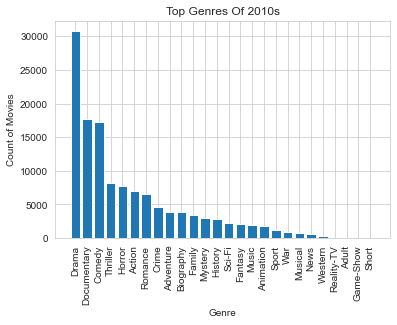

In [372]:
#Note movies with multiple genres counted once for each genre
plt.bar(sorted_genre_count_dict.keys(), sorted_genre_count_dict.values())
plt.title('Top Genres Of 2010s')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Count of Movies')
plt.show()

In [373]:
#zoom in on top 10 for presentation
genre_count_dict_zoom = {k: sorted_genre_count_dict[k] for k in list(sorted_genre_count_dict)[:11]}

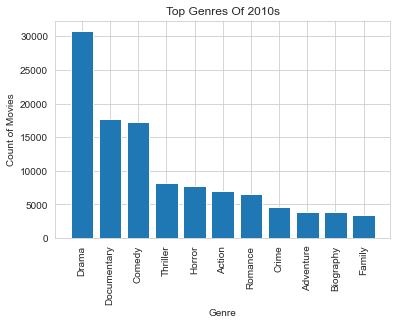

In [374]:
plt.bar(genre_count_dict_zoom.keys(), genre_count_dict_zoom.values())
plt.title('Top Genres Of 2010s')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Count of Movies')
plt.show()

## Look at Prod ROI at least even with IMDB data

In [375]:
imdb_prodROI_breakeven = imdb_with_genre_cols[imdb_with_genre_cols['prod_budget_ROI'] >= 1]

In [376]:
imdb_prodROI_breakeven['averagerating'].mean()

6.49694947569114

In [377]:
imdb_prodROI_breakeven_genres = imdb_prodROI_breakeven[["Sci-Fi", 
                                                        "Fantasy",
                                                        "Horror",
                                                        "Biography",
                                                        "Family",
                                                        "Thriller",
                                                       "Music",
                                                        "Adult",
                                                        "Crime",
                                                        "War",
                                                        "Sport",
                                                        "Musical",
                                                        "Western",
                                                        "Animation",
                                                        "Mystery",
                                                        "Romance",
                                                        "Drama",
                                                        "Comedy",
                                                       "Adventure",
                                                       "Documentary",
                                                       "History",
                                                       "Action",
                                                       "Unknown",
                                                       "Reality-TV",
                                                       "News",
                                                       "Game-Show",
                                                       "Short"]] 

In [378]:
imdb_prodROI_breakeven_genres

,Sci-Fi,Fantasy,Horror,Biography,Family,Thriller,Music,Adult,Crime,War,...,Comedy,Adventure,Documentary,History,Action,Unknown,Reality-TV,News,Game-Show,Short
168,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
321,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
337,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
520,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73405,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73597,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
73598,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
73608,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


## What Genres Make Their Money Back Most Often?

In [379]:
for genre_column in imdb_prodROI_breakeven_genres:
    print(genre_column, imdb_prodROI_breakeven_genres[genre_column].sum())

Sci-Fi 102
Fantasy 95
Horror 115
Biography 88
Family 71
Thriller 179
Music 36
Adult 0
Crime 151
War 7
Sport 22
Musical 5
Western 4
Animation 91
Mystery 92
Romance 139
Drama 471
Comedy 391
Adventure 296
Documentary 22
History 25
Action 326
Unknown 1
Reality-TV 0
News 0
Game-Show 0
Short 0


In [380]:
prodROI_genres = []
prodROI_counts = []

for genre_column in imdb_prodROI_breakeven_genres:
    prodROI_genres.append(genre_column)
    prodROI_counts.append(imdb_prodROI_breakeven_genres[genre_column].sum())
    
prodROI_genres

['Sci-Fi',
 'Fantasy',
 'Horror',
 'Biography',
 'Family',
 'Thriller',
 'Music',
 'Adult',
 'Crime',
 'War',
 'Sport',
 'Musical',
 'Western',
 'Animation',
 'Mystery',
 'Romance',
 'Drama',
 'Comedy',
 'Adventure',
 'Documentary',
 'History',
 'Action',
 'Unknown',
 'Reality-TV',
 'News',
 'Game-Show',
 'Short']

In [381]:
prodROI_counts

[102,
 95,
 115,
 88,
 71,
 179,
 36,
 0,
 151,
 7,
 22,
 5,
 4,
 91,
 92,
 139,
 471,
 391,
 296,
 22,
 25,
 326,
 1,
 0,
 0,
 0,
 0]

In [382]:
#create dataframe for plotting
prodROI_genre_counts = list(zip(prodROI_genres, prodROI_counts)) 
  
# Assign data to tuples. 
prodROI_genre_counts

#create DF
prodROI_genre_counts = pd.DataFrame(prodROI_genre_counts, columns = ['genre', 'count'])
prodROI_genre_counts = prodROI_genre_counts.sort_values(by='count', ascending=False)
prodROI_genre_counts 

,genre,count
16,Drama,471
17,Comedy,391
21,Action,326
18,Adventure,296
5,Thriller,179
8,Crime,151
15,Romance,139
2,Horror,115
0,Sci-Fi,102
1,Fantasy,95


In [383]:
prodROI_genre_counts = prodROI_genre_counts[prodROI_genre_counts['count'] >=4]

## Learning: Of movie genres that make their budget back - Drama, Comedy, Action, Adventure, and Thriller are top 5

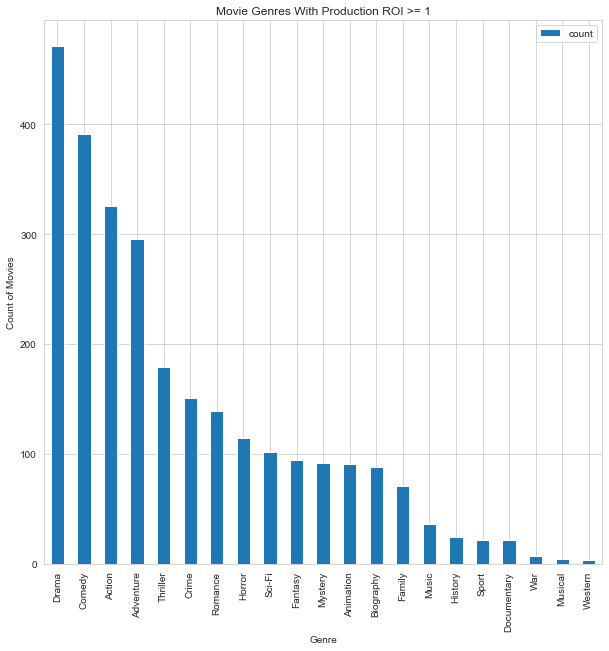

In [384]:
prodROI_genre_counts.plot(kind='bar', x='genre', y='count', figsize = (10,10))
plt.title('Movie Genres With Production ROI >= 1')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.show()

## What Are Production Budgets for Top 5 Genres that Make Money Back

Explore Drama

In [385]:
imdb_prodROI_breakeven_drama = imdb_prodROI_breakeven[imdb_prodROI_breakeven['Drama'] == 1]

In [386]:
imdb_prodROI_breakeven_drama['production_budget_in_mil'].describe()

count    471.000000
mean      30.965138
std       34.824478
min        0.050000
25%        9.300000
50%       20.000000
75%       40.000000
max      210.000000
Name: production_budget_in_mil, dtype: float64

In [387]:
imdb_prodROI_breakeven_drama['production_budget_in_mil'].median()

20.0

In [388]:
imdb_with_genre_cols_drama = imdb_with_genre_cols[imdb_with_genre_cols['Drama'] == 1]

In [389]:
imdb_with_genre_cols_drama['production_budget_in_mil'].describe()

count    726.000000
mean      26.595771
std       32.402310
min        0.020000
25%        6.125000
50%       17.000000
75%       35.000000
max      210.000000
Name: production_budget_in_mil, dtype: float64

In [390]:
imdb_with_genre_cols_drama['averagerating'].mean()

6.401559048980189

Explore Comedy

In [391]:
imdb_with_genre_cols_comedy = imdb_with_genre_cols[imdb_with_genre_cols['Comedy'] == 1]

In [392]:
imdb_with_genre_cols_comedy['production_budget_in_mil'].describe()

count    514.000000
mean      40.303210
std       43.865188
min        0.040000
25%       10.000000
50%       25.500000
75%       51.500000
max      260.000000
Name: production_budget_in_mil, dtype: float64

In [393]:
imdb_with_genre_cols_comedy['averagerating'].mean()

6.0026894158473265

Explore Action

In [394]:
imdb_with_genre_cols_action = imdb_with_genre_cols[imdb_with_genre_cols['Action'] == 1]

In [395]:
imdb_with_genre_cols_action['production_budget_in_mil'].describe()

count    447.000000
mean      78.872573
std       71.181849
min        0.080000
25%       25.000000
50%       58.000000
75%      125.000000
max      410.600000
Name: production_budget_in_mil, dtype: float64

In [396]:
imdb_with_genre_cols_action['averagerating'].mean()

5.810360618202594

Explore Adventure

In [397]:
imdb_with_genre_cols_adventure = imdb_with_genre_cols[imdb_with_genre_cols['Adventure'] == 1]

In [398]:
imdb_with_genre_cols_adventure['production_budget_in_mil'].describe()

count    350.000000
mean     106.289114
std       73.898682
min        0.250000
25%       40.500000
50%      100.000000
75%      160.000000
max      410.600000
Name: production_budget_in_mil, dtype: float64

In [399]:
imdb_with_genre_cols_adventure['averagerating'].mean()

6.196201205134929

Explore Thriller

In [400]:
imdb_with_genre_cols_thriller = imdb_with_genre_cols[imdb_with_genre_cols['Thriller'] == 1]

In [401]:
imdb_with_genre_cols_thriller['production_budget_in_mil'].describe()

count    263.000000
mean      32.548859
std       42.444504
min        0.020000
25%        5.400000
50%       20.000000
75%       40.000000
max      300.000000
Name: production_budget_in_mil, dtype: float64

In [402]:
imdb_with_genre_cols_thriller['averagerating'].mean()

5.63911403188511

In [403]:
## Create DF to visualize median production budgets

In [404]:
imdb_genre_names = ["Drama", "Comedy", "Action", "Adventure", "Thriller"] 
imdb_genre_budgets = [imdb_with_genre_cols_drama['production_budget_in_mil'].median(),
                     imdb_with_genre_cols_comedy['production_budget_in_mil'].median(),
                     imdb_with_genre_cols_action['production_budget_in_mil'].median(),
                     imdb_with_genre_cols_adventure['production_budget_in_mil'].median(),
                     imdb_with_genre_cols_thriller['production_budget_in_mil'].median()] 


#create dataframe for plotting
imdb_top_genre_prodbudgmed = list(zip(imdb_genre_names, imdb_genre_budgets)) 
  
# Assign data to tuples. 
imdb_top_genre_prodbudgmed

#create DF
imdb_top_genre_prodbudgmed = pd.DataFrame(imdb_top_genre_prodbudgmed, columns = ['genre', 'median_prod_budg_in_mil'])
imdb_top_genre_prodbudgmed

,genre,median_prod_budg_in_mil
0,Drama,17.0
1,Comedy,25.5
2,Action,58.0
3,Adventure,100.0
4,Thriller,20.0


In [405]:
imdb_top_genre_prodbudgmed['average_rating'] = [6.4, 5.8, 5.8, 6.2, 5.6]

## Learning: Drama in cheapest to produce with highest average rating



Data Review:
Drama and Thrillers are cheapest to produce and most likely to return ROI; but Thrillers have lowest average rating
Drama and Adventure have highest average rating, but Adventure 5.8x more to produce
    
Business rec:
If money is a concern, best investent would be in Dramas. Next best investment would be in Comedy.

If up front money is not a concern, then can consider Adventure or Action movies. Adventure is 2x the production budget, so depending on how much budget there is, Action is the more conservative choice of the two.

For "filler" movies - can produce Thrillers and Drama for cheapest.

In [406]:
imdb_top_genre_prodbudgmed

,genre,median_prod_budg_in_mil,average_rating
0,Drama,17.0,6.4
1,Comedy,25.5,5.8
2,Action,58.0,5.8
3,Adventure,100.0,6.2
4,Thriller,20.0,5.6


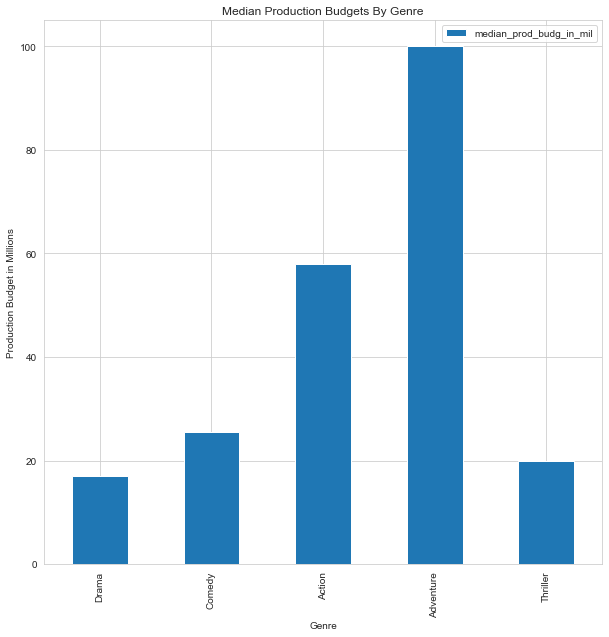

In [407]:
imdb_top_genre_prodbudgmed.plot(kind='bar', x='genre', y='median_prod_budg_in_mil', figsize = (10,10))
plt.title('Median Production Budgets By Genre')
plt.xlabel('Genre')
plt.ylabel('Production Budget in Millions')
plt.show()

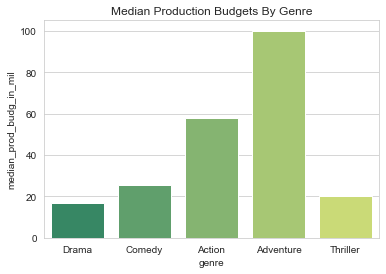

In [408]:
#create bar plot for average temps by month
plt.title('Median Production Budgets By Genre')
sns.barplot(x='genre', y='median_prod_budg_in_mil', data=imdb_top_genre_prodbudgmed, palette='summer')
plt.show()

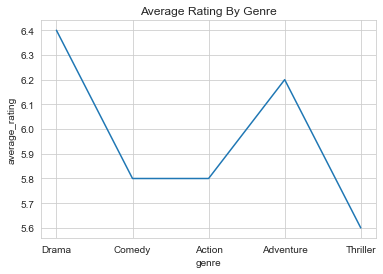

In [409]:
# create line plot for average percipitation levels
plt.title('Average Rating By Genre')
sns.lineplot(x='genre', y='average_rating', data=imdb_top_genre_prodbudgmed, sort=False)
plt.show()

## Plotting


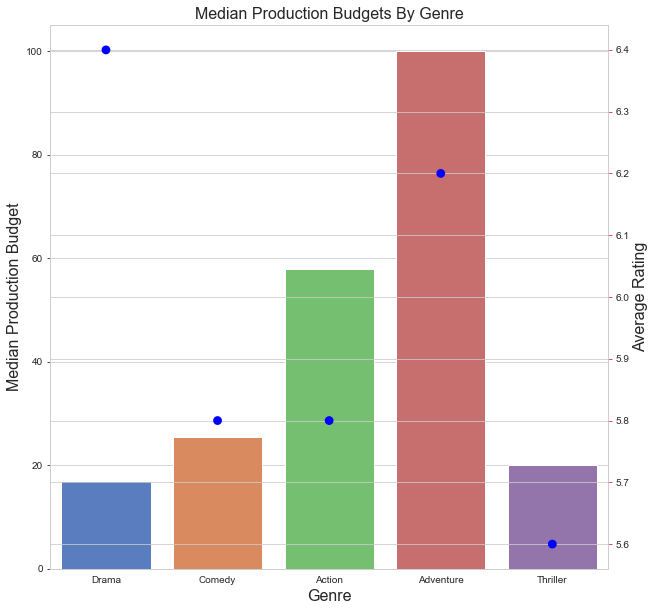

In [410]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab 10'
#bar plot creation
ax1.set_title('Median Production Budgets By Genre', fontsize=16)
sns.barplot(x='genre', y='median_prod_budg_in_mil', data=imdb_top_genre_prodbudgmed, palette='muted')
ax1.set_xlabel('Genre', fontsize=16)
ax1.set_ylabel('Median Production Budget', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.pointplot(x='genre', y='average_rating', data=imdb_top_genre_prodbudgmed, join=False, color='blue')
ax2.set_ylabel('Average Rating', fontsize=16)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()
#save plot
# plt.savefig("images/genre_prod_budg_with_rating.png")

## Merge main table with IMDB with Movie Writers and Directors

In [411]:
# import file imdb.title.crew.csv.gz -- list of movies by tt ID, with corresponding director(s) and writer(s) by nm ID
imdb_tc_df = pd.read_csv('../rawData/zippedData/imdb.title.crew.csv.gz')
# preview file []
imdb_tc_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [412]:
imdb_with_genre_cols = imdb_with_genre_cols.set_index('tconst').join(imdb_tc_df.set_index('tconst'))

In [413]:
imdb_with_genre_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt1699720 to tt4373884
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title_year                73856 non-null  object 
 1   primary_title             73856 non-null  object 
 2   original_title            73856 non-null  object 
 3   start_year                73856 non-null  int64  
 4   runtime_minutes           66236 non-null  float64
 5   genres_x                  73856 non-null  object 
 6   averagerating             73856 non-null  float64
 7   numvotes                  73856 non-null  int64  
 8   genres_y                  73856 non-null  object 
 9   Biography                 73856 non-null  int64  
 10  News                      73856 non-null  int64  
 11  Comedy                    73856 non-null  int64  
 12  Adventure                 73856 non-null  int64  
 13  Music                     73856 non-null  int64  
 14 

In [414]:
imdb_with_genre_cols['directors'] = imdb_with_genre_cols['directors'].fillna('Unknown')

In [415]:
imdb_with_genre_cols['writers'] = imdb_with_genre_cols['writers'].fillna('Unknown')

In [416]:
imdb_with_genre_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt1699720 to tt4373884
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title_year                73856 non-null  object 
 1   primary_title             73856 non-null  object 
 2   original_title            73856 non-null  object 
 3   start_year                73856 non-null  int64  
 4   runtime_minutes           66236 non-null  float64
 5   genres_x                  73856 non-null  object 
 6   averagerating             73856 non-null  float64
 7   numvotes                  73856 non-null  int64  
 8   genres_y                  73856 non-null  object 
 9   Biography                 73856 non-null  int64  
 10  News                      73856 non-null  int64  
 11  Comedy                    73856 non-null  int64  
 12  Adventure                 73856 non-null  int64  
 13  Music                     73856 non-null  int64  
 14 

In [417]:
imdb_drama_writ_dir = imdb_with_genre_cols[(imdb_with_genre_cols['Drama'] == 1) & (imdb_with_genre_cols['directors'] != "Unknown")]

In [418]:
imdb_drama_writ_dir = imdb_drama_writ_dir.reset_index()

## Look at Top Drama Directors for Recommendations

In [419]:
imdb_drama_writ_dir['averagerating'].describe()

count    30676.000000
mean         6.399593
std          1.276519
min          1.000000
25%          5.700000
50%          6.500000
75%          7.200000
max         10.000000
Name: averagerating, dtype: float64

In [420]:
top_rated_imdb_dramas = imdb_drama_writ_dir[imdb_drama_writ_dir['averagerating'] >= 6.5]

## Left off here - Redefining Top Drama Director as those with highest average rating. Trying to get dataframe with just average rating in the chart.

In [421]:
top_rated_imdb_dramas['runtime_minutes'].mean()

99.3341416100873

In [422]:
top_rated_imdb_dramas.groupby(['directors']).agg("mean").sort_values(by='averagerating', ascending=False).head(20)

,start_year,runtime_minutes,averagerating,numvotes,Biography,News,Comedy,Adventure,Music,Game-Show,...,production_budget,domestic_gross,worldwide_gross,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p
directors,,,,,,,,,,,,,,,,,,,,,
nm6893562,2017.0,NaN,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm10369569,2019.0,138.0,9.9,417.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm6484261,2019.0,NaN,9.8,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm6630411,2014.0,61.0,9.8,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0837087,2015.0,50.0,9.7,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm9982663,2018.0,125.0,9.7,639.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm2495167,2019.0,94.0,9.7,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm10005127,2017.0,69.0,9.6,98.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm2802157,2019.0,75.0,9.6,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [423]:
top_20_drama_directors = imdb_drama_writ_dir.groupby(['directors']).count().sort_values(by='tconst', ascending=False).head(20)

In [424]:
top_20_drama_directors

,tconst,title_year,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,genres_y,...,worldwide_gross,release_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p,writers
directors,,,,,,,,,,,,,,,,,,,,,
nm1907554,15,15,15,15,15,12,15,15,15,15,...,0,0,0,0,0,0,0,0,0,15
nm0393254,14,14,14,14,14,14,14,14,14,14,...,0,0,0,0,0,0,0,0,0,14
nm1347153,14,14,14,14,14,14,14,14,14,14,...,4,4,4,4,4,4,4,4,4,14
nm0019723,13,13,13,13,13,11,13,13,13,13,...,0,0,0,0,0,0,0,0,0,13
nm0482774,13,13,13,13,13,9,13,13,13,13,...,0,0,0,0,0,0,0,0,0,13
nm1507117,12,12,12,12,12,9,12,12,12,12,...,0,0,0,0,0,0,0,0,0,12
nm3410783,12,12,12,12,12,11,12,12,12,12,...,0,0,0,0,0,0,0,0,0,12
nm2243359,12,12,12,12,12,9,12,12,12,12,...,0,0,0,0,0,0,0,0,0,12
nm3008388,12,12,12,12,12,12,12,12,12,12,...,0,0,0,0,0,0,0,0,0,12


In [425]:
top_20_drama_directors.index

Index(['nm1907554', 'nm0393254', 'nm1347153', 'nm0019723', 'nm0482774',
       'nm1507117', 'nm3410783', 'nm2243359', 'nm3008388', 'nm0386382',
       'nm1283069', 'nm0290556', 'nm2128244', 'nm3583561', 'nm6594610',
       'nm1879025', 'nm2538739', 'nm0740213', 'nm1846132', 'nm2551464'],
      dtype='object', name='directors')

In [426]:
drama_directors_list = []

for row in top_20_drama_directors.index:
    drama_directors_list.append(row)

drama_directors_list

['nm1907554',
 'nm0393254',
 'nm1347153',
 'nm0019723',
 'nm0482774',
 'nm1507117',
 'nm3410783',
 'nm2243359',
 'nm3008388',
 'nm0386382',
 'nm1283069',
 'nm0290556',
 'nm2128244',
 'nm3583561',
 'nm6594610',
 'nm1879025',
 'nm2538739',
 'nm0740213',
 'nm1846132',
 'nm2551464']

In [427]:
# import file imdb.name.basics.csv.gz -- list of imdb people with list of professions
imdb_nb_df = pd.read_csv('../rawData/zippedData/imdb.name.basics.csv.gz')
# preview file
imdb_nb_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [428]:
drama_directors_list[0]
(imdb_nb_df[imdb_nb_df['nconst'] == drama_directors_list[0]])

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
102152,nm1907554,Kaushik Ganguly,1968.0,NaN,"actor,director,writer","tt4321682,tt2363255,tt5716302,tt7158504"


In [429]:
imdb_with_genre_cols = imdb_with_genre_cols.reset_index()

In [430]:
drama_directors_list[1]
(imdb_nb_df[imdb_nb_df['nconst'] == drama_directors_list[1]])

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
88152,nm0393254,Sang-soo Hong,1960.0,NaN,"director,writer,producer","tt0253378,tt4768776,tt1176096,tt6412864"


In [431]:
drama_directors_list[2]
(imdb_nb_df[imdb_nb_df['nconst'] == drama_directors_list[2]])

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
131714,nm1347153,Tyler Perry,1969.0,NaN,"writer,director,producer","tt0455612,tt2267998,tt1142800,tt0422093"


In [432]:
drama_directors_list[3]
(imdb_nb_df[imdb_nb_df['nconst'] == drama_directors_list[3]])

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
18673,nm0019723,Adolfo Alix Jr.,1978.0,NaN,"director,writer,producer","tt1069260,tt2245970,tt1783362,tt1206475"


In [433]:
drama_directors_list[4]
(imdb_nb_df[imdb_nb_df['nconst'] == drama_directors_list[4]])

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
75131,nm0482774,Joel Lamangan,NaN,NaN,"director,actor,writer","tt0113082,tt0479725,tt1954731,tt0390341"


# Learning: Top Drama Directors include: Kaushik Ganguly, Sang-soo Hong, Tyler Perry, Adolfo Alix Jr., Joel Lamangan

Tyler Perry is American top Drama filmmaker based on 

In [434]:
# drama_director_names = []

# for director in drama_directors_list:
#     drama_director_names.append(imdb_nb_df[imdb_nb_df['nconst'] == director])
    

## Look into Release Month

In [435]:
imdb_release_dates = imdb_with_genre_cols[imdb_with_genre_cols['release_date'].notnull()]

In [436]:
imdb_release_dates = imdb_release_dates.reset_index()

In [437]:
imdb_release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1498 non-null   int64  
 1   tconst                    1498 non-null   object 
 2   title_year                1498 non-null   object 
 3   primary_title             1498 non-null   object 
 4   original_title            1498 non-null   object 
 5   start_year                1498 non-null   int64  
 6   runtime_minutes           1490 non-null   float64
 7   genres_x                  1498 non-null   object 
 8   averagerating             1498 non-null   float64
 9   numvotes                  1498 non-null   int64  
 10  genres_y                  1498 non-null   object 
 11  Biography                 1498 non-null   int64  
 12  News                      1498 non-null   int64  
 13  Comedy                    1498 non-null   int64  
 14  Adventur

In [438]:
imdb_release_dates.head()

,index,tconst,title_year,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,...,release_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p,directors,writers
0,18,tt3526286,#Horror 2015,#Horror,#Horror,2015,101.0,"[Crime, Drama, Horror]",3.0,3092,...,2015,0.00,1.5,0.000000,0.00,0.00,NaN,NaN,nm0836964,nm0836964
1,168,tt1179933,10 Cloverfield Lane 2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]",7.2,260383,...,2016,108.29,5.0,21.658000,72.08,36.21,0.67,0.33,nm0870469,"nm1061091,nm1173295,nm3227090"
2,170,tt3453052,10 Days in a Madhouse 2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama],6.7,1114,...,2015,0.01,12.0,0.000833,0.01,0.00,1.00,0.00,nm0385725,nm0385725
3,319,tt1413492,12 Strong 2018,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]",6.6,50155,...,2018,71.12,35.0,2.032000,45.82,25.30,0.64,0.36,nm3350420,"nm0848217,nm0185976,nm3066678"
4,321,tt2024544,12 Years a Slave 2013,12 Years a Slave,12 Years a Slave,2013,134.0,"[Biography, Drama, History]",8.1,577301,...,2013,181.03,20.0,9.051500,56.67,124.36,0.31,0.69,nm2588606,"nm0725983,nm1185849"


In [439]:
imdb_release_dates['release_date'][0].split(" ")[0]

'Nov'

In [440]:
imdb_release_dates['release_month'] = imdb_release_dates['release_date'].map(lambda x: x.split(" ")[0])

In [441]:
imdb_release_dates.head()

,index,tconst,title_year,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,...,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p,directors,writers,release_month
0,18,tt3526286,#Horror 2015,#Horror,#Horror,2015,101.0,"[Crime, Drama, Horror]",3.0,3092,...,0.00,1.5,0.000000,0.00,0.00,NaN,NaN,nm0836964,nm0836964,Nov
1,168,tt1179933,10 Cloverfield Lane 2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]",7.2,260383,...,108.29,5.0,21.658000,72.08,36.21,0.67,0.33,nm0870469,"nm1061091,nm1173295,nm3227090",Mar
2,170,tt3453052,10 Days in a Madhouse 2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama],6.7,1114,...,0.01,12.0,0.000833,0.01,0.00,1.00,0.00,nm0385725,nm0385725,Nov
3,319,tt1413492,12 Strong 2018,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]",6.6,50155,...,71.12,35.0,2.032000,45.82,25.30,0.64,0.36,nm3350420,"nm0848217,nm0185976,nm3066678",Jan
4,321,tt2024544,12 Years a Slave 2013,12 Years a Slave,12 Years a Slave,2013,134.0,"[Biography, Drama, History]",8.1,577301,...,181.03,20.0,9.051500,56.67,124.36,0.31,0.69,nm2588606,"nm0725983,nm1185849",Oct


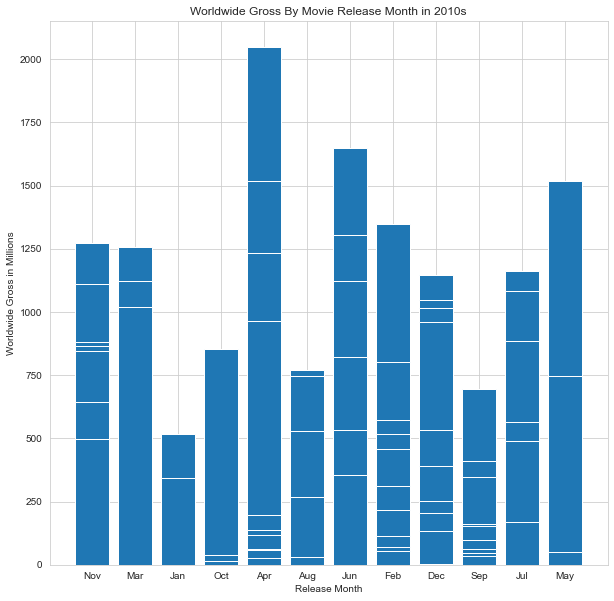

In [442]:
x = imdb_release_dates['release_month']
y = imdb_release_dates['worldwide_gross_in_mil']
plt.figure (figsize=(10,10))
plt.bar(x, y)
plt.title('Worldwide Gross By Movie Release Month in 2010s')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross in Millions')
plt.show()
# n=1498

## LB - Create Month in Num and Replot

In [443]:
imdb_release_dates['month_in_num'] = 0

In [444]:
imdb_release_dates['release_month'][:5]

0    Nov
1    Mar
2    Nov
3    Jan
4    Oct
Name: release_month, dtype: object

In [445]:
for row in imdb_release_dates['release_month'][:5]:
    print(row)

Nov
Mar
Nov
Jan
Oct


In [446]:
for row in imdb_release_dates.index:
    if imdb_release_dates['release_month'][row] == 'Jan':
        imdb_release_dates['month_in_num'][row] = 1
    elif imdb_release_dates['release_month'][row] == 'Feb':
        imdb_release_dates['month_in_num'][row] = 2
    elif imdb_release_dates['release_month'][row] == 'Mar':
        imdb_release_dates['month_in_num'][row] = 3
    elif imdb_release_dates['release_month'][row] == 'Apr':
        imdb_release_dates['month_in_num'][row] = 4
    elif imdb_release_dates['release_month'][row] == 'May':
        imdb_release_dates['month_in_num'][row] = 5
    elif imdb_release_dates['release_month'][row] == 'Jun':
        imdb_release_dates['month_in_num'][row] = 6
    elif imdb_release_dates['release_month'][row] == 'Jul':
        imdb_release_dates['month_in_num'][row] = 7
    elif imdb_release_dates['release_month'][row] == 'Aug':
        imdb_release_dates['month_in_num'][row] = 8    
    elif imdb_release_dates['release_month'][row] == 'Sep':
        imdb_release_dates['month_in_num'][row] = 9
    elif imdb_release_dates['release_month'][row] == 'Oct':
        imdb_release_dates['month_in_num'][row] = 10     
    elif imdb_release_dates['release_month'][row] == 'Nov':
        imdb_release_dates['month_in_num'][row] = 11
    else:
        imdb_release_dates['month_in_num'][row] = 12

<ipython-input-446-74638612f233>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_release_dates['month_in_num'][row] = 11
<ipython-input-446-74638612f233>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_release_dates['month_in_num'][row] = 3
<ipython-input-446-74638612f233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_release_dates['month_in_num'][row] = 1
<ipython-input-446-74638612f233>:21: SettingWithCopyWarning

In [447]:
imdb_release_dates.head()

,index,tconst,title_year,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,...,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p,directors,writers,release_month,month_in_num
0,18,tt3526286,#Horror 2015,#Horror,#Horror,2015,101.0,"[Crime, Drama, Horror]",3.0,3092,...,1.5,0.000000,0.00,0.00,NaN,NaN,nm0836964,nm0836964,Nov,11
1,168,tt1179933,10 Cloverfield Lane 2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]",7.2,260383,...,5.0,21.658000,72.08,36.21,0.67,0.33,nm0870469,"nm1061091,nm1173295,nm3227090",Mar,3
2,170,tt3453052,10 Days in a Madhouse 2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama],6.7,1114,...,12.0,0.000833,0.01,0.00,1.00,0.00,nm0385725,nm0385725,Nov,11
3,319,tt1413492,12 Strong 2018,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]",6.6,50155,...,35.0,2.032000,45.82,25.30,0.64,0.36,nm3350420,"nm0848217,nm0185976,nm3066678",Jan,1
4,321,tt2024544,12 Years a Slave 2013,12 Years a Slave,12 Years a Slave,2013,134.0,"[Biography, Drama, History]",8.1,577301,...,20.0,9.051500,56.67,124.36,0.31,0.69,nm2588606,"nm0725983,nm1185849",Oct,10


In [448]:
imdb_release_dates['release_date'] = pd.to_datetime(imdb_release_dates['release_date'])

In [449]:
imdb_release_dates['release_month_number'] = imdb_release_dates['release_date'].dt.month

In [450]:
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_numbers = list(range(1,13))

month_dict = dict(zip(month_names, month_numbers))

In [451]:
month_dict

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [452]:
import matplotlib.dates as mdates

In [453]:
imdb_release_dates.drop(labels='month_in_num', axis=1)

,index,tconst,title_year,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,...,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p,directors,writers,release_month,release_month_number
0,18,tt3526286,#Horror 2015,#Horror,#Horror,2015,101.0,"[Crime, Drama, Horror]",3.0,3092,...,1.5,0.000000,0.00,0.00,NaN,NaN,nm0836964,nm0836964,Nov,11
1,168,tt1179933,10 Cloverfield Lane 2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]",7.2,260383,...,5.0,21.658000,72.08,36.21,0.67,0.33,nm0870469,"nm1061091,nm1173295,nm3227090",Mar,3
2,170,tt3453052,10 Days in a Madhouse 2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama],6.7,1114,...,12.0,0.000833,0.01,0.00,1.00,0.00,nm0385725,nm0385725,Nov,11
3,319,tt1413492,12 Strong 2018,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]",6.6,50155,...,35.0,2.032000,45.82,25.30,0.64,0.36,nm3350420,"nm0848217,nm0185976,nm3066678",Jan,1
4,321,tt2024544,12 Years a Slave 2013,12 Years a Slave,12 Years a Slave,2013,134.0,"[Biography, Drama, History]",8.1,577301,...,20.0,9.051500,56.67,124.36,0.31,0.69,nm2588606,"nm0725983,nm1185849",Oct,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,73597,tt1222817,Zookeeper 2011,Zookeeper,Zookeeper,2011,102.0,"[Comedy, Family, Romance]",5.2,52396,...,80.0,2.135125,80.36,90.45,0.47,0.53,nm0178997,"nm0048169,nm0720609,nm0416673,nm0771065,nm0740115",Jul,7
1494,73598,tt1608290,Zoolander 2 2016,Zoolander 2,Zoolander 2,2016,101.0,[Comedy],4.7,59914,...,50.0,1.107000,28.85,26.50,0.52,0.48,nm0001774,"nm0857620,nm0001774,nm0831557,nm0357453,nm0766153",Feb,2
1495,73608,tt2948356,Zootopia 2016,Zootopia,Zootopia,2016,108.0,"[Adventure, Animation, Comedy]",8.0,383446,...,150.0,6.796200,341.27,678.16,0.33,0.67,"nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888...",Mar,3
1496,73625,tt2249221,Zulu 2013,Zulu,Zulu,2013,110.0,"[Crime, Drama, Thriller]",6.7,16607,...,16.0,0.115000,0.00,1.84,0.00,1.00,nm1362432,"nm2530716,nm1272853,nm1362432",Dec,12


In [454]:
imdb_release_dates['worldwide_gross_in_mil'].head()

0      0.00
1    108.29
2      0.01
3     71.12
4    181.03
Name: worldwide_gross_in_mil, dtype: float64

In [455]:
imdb_release_dates['release_month_number'].head()

0    11
1     3
2    11
3     1
4    10
Name: release_month_number, dtype: int64

In [456]:
imdb_release_dates[['worldwide_gross_in_mil', 'release_month_number']].head()

,worldwide_gross_in_mil,release_month_number
0,0.00,11
1,108.29,3
2,0.01,11
3,71.12,1
4,181.03,10


In [457]:
imdb_release_dates['release_month_number']

0       11
1        3
2       11
3        1
4       10
        ..
1493     7
1494     2
1495     3
1496    12
1497     1
Name: release_month_number, Length: 1498, dtype: int64

In [458]:
imdb_release_dates.groupby(['release_month'])['worldwide_gross_in_mil'].agg(['sum'])

,sum
release_month,
Apr,14778.52
Aug,11378.60
Dec,22045.37
Feb,12884.42
Jan,5654.15
Jul,23893.14
Jun,27466.34
Mar,20920.30
May,24474.02


In [459]:
imdb_release_months_gross = imdb_release_dates.groupby(['release_month'])['worldwide_gross_in_mil'].agg(['sum'])

In [461]:
imdb_release_months_gross = imdb_release_months_gross.reset_index()

In [462]:
imdb_release_months_gross

,release_month,sum
0,Apr,14778.52
1,Aug,11378.60
2,Dec,22045.37
3,Feb,12884.42
4,Jan,5654.15
5,Jul,23893.14
6,Jun,27466.34
7,Mar,20920.30
8,May,24474.02
9,Nov,27038.26


In [463]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
imdb_release_dates['release_month'] = pd.Categorical(imdb_release_dates['release_month'], categories=months, ordered=True)
re = r.sort_values(by='release_month').set_index('release_month')

NameError: name 'r' is not defined

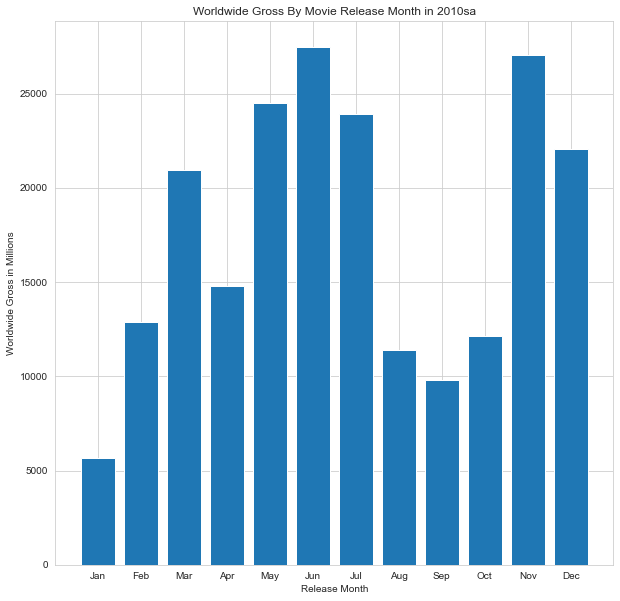

In [316]:
x = imdb_release_months_gross['release_month']
y = imdb_release_months_gross['sum']
plt.figure (figsize=(10,10))
plt.bar(x, y)
plt.title('Worldwide Gross By Movie Release Month in 2010sa')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross in Millions')
plt.show()
# n=1498

## Take top half with most reviews (49 votes was median)

In [298]:
imdb_release_dates['release_month']

0       Nov
1       Mar
2       Nov
3       Jan
4       Oct
       ... 
1493    Jul
1494    Feb
1495    Mar
1496    Dec
1497    Jan
Name: release_month, Length: 1498, dtype: category
Categories (12, object): [Jan < Feb < Mar < Apr ... Sep < Oct < Nov < Dec]

In [108]:
imdb_with_genre_cols['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [109]:
imdb_with_reviews = imdb_with_genre_cols[imdb_with_genre_cols['numvotes'] >= 49]

In [110]:
imdb_with_reviews['averagerating'].describe()

count    37073.000000
mean         5.981504
std          1.378939
min          1.000000
25%          5.200000
50%          6.200000
75%          7.000000
max          9.900000
Name: averagerating, dtype: float64

In [111]:
imdb_with_reviews['start_year'].describe()

count    37073.000000
mean      2014.280015
std          2.588372
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2019.000000
Name: start_year, dtype: float64

## Take top rated movies (median was 6.2)

In [112]:
imdb_top_half_ratings = imdb_with_reviews[imdb_with_reviews['averagerating'] >= 6.2]

In [113]:
imdb_top_half_ratings

,tconst,title_year,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,genres_y,...,release_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p,directors,writers
0,tt1699720,!Women Art Revolution 2010,!Women Art Revolution,Women Art Revolution,2010,83.0,[Documentary],6.9,196,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0380961,Unknown
14,tt8372826,#Female Pleasure 2018,#Female Pleasure,#Female Pleasure,2018,97.0,[Documentary],7.6,274,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1140487,nm1140487
22,tt3950838,#O2LForever 2015,#O2LForever,#O2LForever,2015,95.0,"[Biography, Documentary, Music]",9.2,66,"[Biography, Documentary, Music]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1389536,nm1389536
41,tt8076266,#TemanTapiMenikah 2018,#TemanTapiMenikah,#TemanTapiMenikah,2018,102.0,"[Biography, Drama]",7.1,338,"[Biography, Drama]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1266812,"nm1345541,nm9664560,nm8531081,nm9106681"
45,tt5293858,#Walang Forever 2015,#Walang Forever,#Walang Forever,2015,119.0,"[Comedy, Romance]",7.1,160,"[Comedy, Romance]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm2758967,nm3040029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73839,tt1813774,Über uns das All 2011,Über uns das All,Über uns das All,2011,88.0,[Drama],6.7,616,[Drama],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1099979,nm1099979
73849,tt5753212,Üç Harfliler 3: Karabüyü 2016,Üç Harfliler 3: Karabüyü,Üç Harfliler 3: Karabüyü,2016,87.0,[Horror],6.8,730,[Horror],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm2201450,nm2201450
73850,tt9598594,Üç Harfliler: Adak 2019,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"[Horror, Thriller]",7.2,212,"[Horror, Thriller]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm2201450,nm2201450
73854,tt3509772,ärtico 2014,ärtico,ärtico,2014,78.0,[Drama],6.6,101,[Drama],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0892804,"nm4776012,nm4775436,nm6264808,nm0892804"


In [114]:
imdb_top_half_ratings['genres_x'] = imdb_top_half_ratings['genres_x'].astype(str)

<ipython-input-114-2ce7548f133a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_top_half_ratings['genres_x'] = imdb_top_half_ratings['genres_x'].astype(str)


## Look at genres with the highest ratings (18k)

In [115]:
imdb_high_ratings_reviews_genres = pd.DataFrame(imdb_top_half_ratings.groupby(['genres_x'])['tconst'].count().sort_values(ascending=False))

In [116]:
imdb_high_ratings_reviews_genres.head(25)

,tconst
genres_x,
['Drama'],3504
['Documentary'],2448
"['Comedy', 'Drama']",964
['Comedy'],938
"['Drama', 'Romance']",567
"['Comedy', 'Drama', 'Romance']",403
"['Comedy', 'Romance']",321
"['Drama', 'Thriller']",252
"['Documentary', 'Music']",229


In [117]:
imdb_top_half_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18757 entries, 0 to 73855
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tconst                    18757 non-null  object 
 1   title_year                18757 non-null  object 
 2   primary_title             18757 non-null  object 
 3   original_title            18757 non-null  object 
 4   start_year                18757 non-null  int64  
 5   runtime_minutes           18077 non-null  float64
 6   genres_x                  18757 non-null  object 
 7   averagerating             18757 non-null  float64
 8   numvotes                  18757 non-null  int64  
 9   genres_y                  18757 non-null  object 
 10  Biography                 18757 non-null  int64  
 11  News                      18757 non-null  int64  
 12  Comedy                    18757 non-null  int64  
 13  Adventure                 18757 non-null  int64  
 14  Music 

In [118]:
imdb_top_half_ratings = imdb_top_half_ratings[imdb_top_half_ratings['runtime_minutes'].notna()]

## Look at runtime vs average rating with pared down table (18k)

In [119]:
imdb_top_half_ratings['runtime_minutes'].describe()

count    18077.000000
mean       102.860652
std        109.962764
min          8.000000
25%         88.000000
50%         98.000000
75%        113.000000
max      14400.000000
Name: runtime_minutes, dtype: float64

In [120]:
imdb_top_half_ratings[(imdb_top_half_ratings['runtime_minutes'] <= 400)]

,tconst,title_year,primary_title,original_title,start_year,runtime_minutes,genres_x,averagerating,numvotes,genres_y,...,release_year,worldwide_gross_in_mil,production_budget_in_mil,prod_budget_ROI,domestic_gross_in_mil,foreign_gross_in_mil,domestic_gross_p,foreign_gross_p,directors,writers
0,tt1699720,!Women Art Revolution 2010,!Women Art Revolution,Women Art Revolution,2010,83.0,['Documentary'],6.9,196,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0380961,Unknown
14,tt8372826,#Female Pleasure 2018,#Female Pleasure,#Female Pleasure,2018,97.0,['Documentary'],7.6,274,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1140487,nm1140487
22,tt3950838,#O2LForever 2015,#O2LForever,#O2LForever,2015,95.0,"['Biography', 'Documentary', 'Music']",9.2,66,"[Biography, Documentary, Music]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1389536,nm1389536
41,tt8076266,#TemanTapiMenikah 2018,#TemanTapiMenikah,#TemanTapiMenikah,2018,102.0,"['Biography', 'Drama']",7.1,338,"[Biography, Drama]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1266812,"nm1345541,nm9664560,nm8531081,nm9106681"
45,tt5293858,#Walang Forever 2015,#Walang Forever,#Walang Forever,2015,119.0,"['Comedy', 'Romance']",7.1,160,"[Comedy, Romance]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm2758967,nm3040029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73839,tt1813774,Über uns das All 2011,Über uns das All,Über uns das All,2011,88.0,['Drama'],6.7,616,[Drama],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1099979,nm1099979
73849,tt5753212,Üç Harfliler 3: Karabüyü 2016,Üç Harfliler 3: Karabüyü,Üç Harfliler 3: Karabüyü,2016,87.0,['Horror'],6.8,730,[Horror],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm2201450,nm2201450
73850,tt9598594,Üç Harfliler: Adak 2019,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"['Horror', 'Thriller']",7.2,212,"[Horror, Thriller]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm2201450,nm2201450
73854,tt3509772,ärtico 2014,ärtico,ärtico,2014,78.0,['Drama'],6.6,101,[Drama],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0892804,"nm4776012,nm4775436,nm6264808,nm0892804"


In [121]:
imdb_top_half_ratings = imdb_top_half_ratings[(imdb_top_half_ratings['runtime_minutes'] < 14000)]

In [122]:
imdb_top_half_ratings_zoom = imdb_top_half_ratings[(imdb_top_half_ratings['runtime_minutes'] <= 400)]

In [123]:
imdb_top_half_ratings.groupby['runtime']

TypeError: 'method' object is not subscriptable

In [ ]:
x = imdb_top_half_ratings_zoom['runtime_minutes']
y = imdb_top_half_ratings_zoom['averagerating']
plt.figure (figsize=(10,10))
plt.scatter(x, y)
plt.title('IMDB: Runtime vs Avg Rating')
plt.xlabel('Movie Runtime in Minutes')
plt.ylabel('IMDB Avg Rating')
plt.show()